In [47]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [57]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta, date

# Reflect Tables into SQLAlchemy ORM

In [58]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [59]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [60]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [61]:
# View all of the classes that automap found
class_names = Base.classes.keys()
for cls_name in class_names:
    print(cls_name)

measurement
station


In [86]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [87]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [88]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(most_recent_date)

2017-08-23


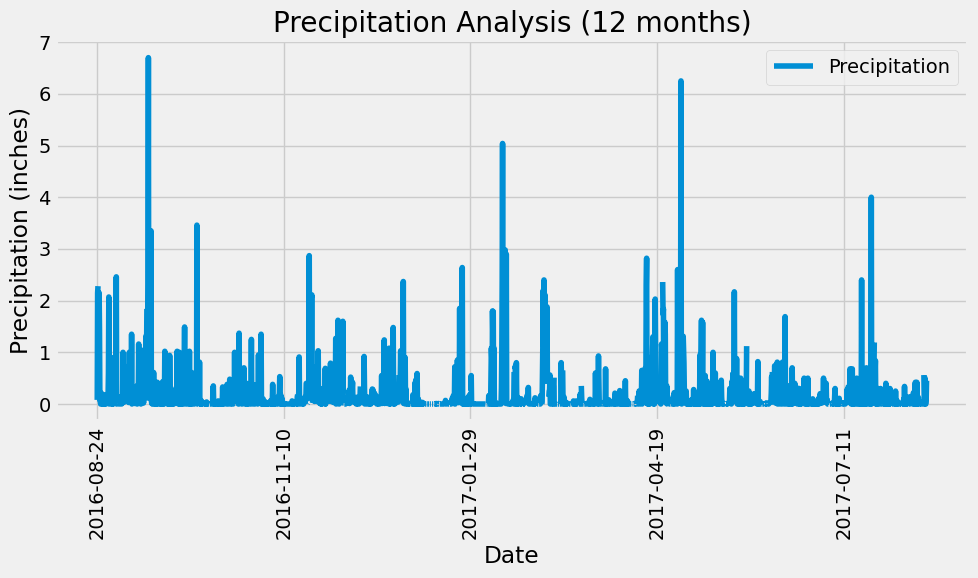

In [89]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date 1 year ago from the most recent date
one_year_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Load the query results into a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=["Date", "Precipitation"])

# Set the index to the date column
precipitation_df.set_index("Date", inplace=True)

# Sort the DataFrame by date
precipitation_df = precipitation_df.sort_index()

# Plot the results
precipitation_df.plot(y="Precipitation", figsize=(10, 6))
plt.title("Precipitation Analysis (12 months)")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Close the session
session.close()

In [90]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Use Pandas to print summary statistics for precipitation data
summary_stats = precipitation_df.describe()
(summary_stats)


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [77]:
# Design a query to calculate the total number of stations in the dataset
# Query to calculate the total number of stations
total_stations = session.query(func.count(Station.station)).scalar()

# Print the result
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [78]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the result
for station, count in station_activity:
    print(f"Station: {station}, Observation Count: {count}")

Station: USC00519281, Observation Count: 2772
Station: USC00519397, Observation Count: 2724
Station: USC00513117, Observation Count: 2709
Station: USC00519523, Observation Count: 2669
Station: USC00516128, Observation Count: 2612
Station: USC00514830, Observation Count: 2202
Station: USC00511918, Observation Count: 1979
Station: USC00517948, Observation Count: 1372
Station: USC00518838, Observation Count: 511


In [80]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Find the most active station
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()[0]

# Query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

# Unpack the result
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

# Print the results
print(f"Most Active Station: {most_active_station}")
print(f"Lowest Temperature: {lowest_temp}°F")
print(f"Highest Temperature: {highest_temp}°F")
print(f"Average Temperature: {avg_temp:.2f}°F")


Most Active Station: USC00519281
Lowest Temperature: 54.0°F
Highest Temperature: 85.0°F
Average Temperature: 71.66°F


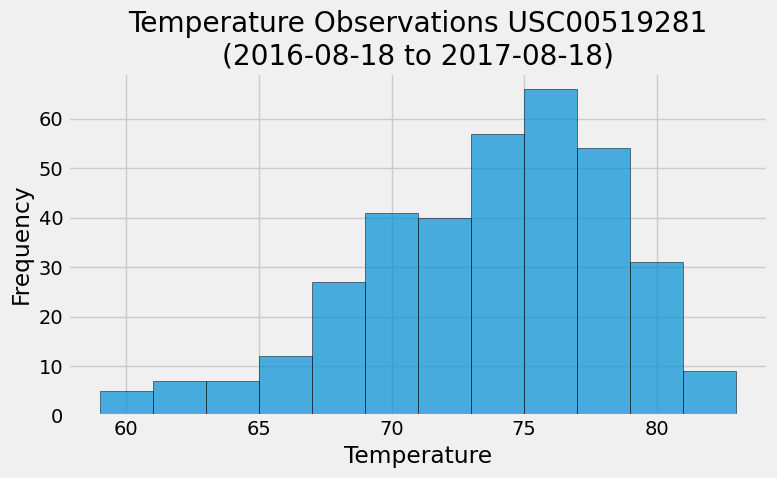

In [83]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Define the most active station ID
most_active_station = 'USC00519281'  

# Calculate the date 1 year ago from the most recent date
most_recent_date = session.query(Measurement.date).\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.date.desc()).first()[0]

one_year_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

# Load the query results into a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=["Date", "Temperature"])

# Plot the results as a histogram
plt.figure(figsize=(8, 5))
plt.hist(temperature_df["Temperature"], bins=12, alpha=0.7, edgecolor="k")
plt.title(f"Temperature Observations {most_active_station}\n({one_year_ago.strftime('%Y-%m-%d')} to {most_recent_date})")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Close Session

In [84]:
# Close Session
session.close()